# Exploratory Data Analysis - EDA

Comenzamos el analisis de nuestra base de datos analizando por primera vez el Data Frame . Nuestro objetivo es realizar un analisis exploratorio, estudiando los datos,  buscando posibles patrones, visualizando datos estadisticos y encontrando posibles relaciones que nos seran utililes para entender el contexto del data Frame y posteriormente para nuestro modelo de Machine Learning.

Con este analisis esperamos obtener informacion basica de todo el Data Frame e informacion mas profunda de la variable objetivo  __Target Seguro de Hogar__

Iremos cargando las librerias que vamos a usar para nuestro modelo segun las vayamos necesitando. 

In [2]:
# Librería que permite trabajar con datos estructurados en filas y columnas
import pandas as pd

In [3]:
#Leemos la base de datos y asociamos a la variable df el data set
df = pd.read_csv('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Cleanning & Merging/df_cleanned.csv')

In [4]:
# Generamos una muestra aleatoria. Sacamos por pantalla 5 filas mediante la funcion sample.
# De esta forma visualizamos la estructura..
df.sample(5)

,cliente,saldo_captacion,esta_carterizado,cliente_bbp,tipo_gestor,gestor,cartera_patron,codigo_cartera,digital_3_meses,camino_digital,...,edad,seg_valor,seg_recorrido,dz,oficina,lp_seg_vida,lp_seg_acc,lp_seg_salud,lp_seg_hogar,lp_seg_auto
418222,418223,13634.69,SI,NO,ASESOR FINANCIERO,33771.0,ASESORAMIENTO FINANCIERO,9526.0,NO,POCO USO,...,74.0,ALTO,MEDIO RECORRIDO,4,422,0,0,0,1,0
288228,288229,992.96,SI,NO,ASESOR FINANCIERO,2132.0,ASESORAMIENTO FINANCIERO,12729.0,NO,POCO USO,...,80.0,MEDIO,MEDIO RECORRIDO,1,118,0,0,0,0,0
395123,395124,2847.73,SI,NO,ASESOR FINANCIERO,34153.0,ASESORAMIENTO FINANCIERO,37065.0,SI,CONSULTIVO,...,55.0,MEDIO,ALTO RECORRIDO,4,419,0,0,0,0,0
410441,410442,343168.24,SI,NO,ASESOR FINANCIERO,33944.0,ASESORAMIENTO FINANCIERO,34128.0,NO,COMPRADOR,...,67.0,ALTO,BAJO RECORRIDO,8,819,0,0,0,0,0
166163,166164,100083.70,SI,NO,ASESOR FINANCIERO,8065.0,ASESORAMIENTO FINANCIERO,14125.0,SI,TRANSACCIONAL,...,52.0,ALTO,BAJO RECORRIDO,2,220,0,0,0,0,0


In [5]:
# Imprimimos Dimension y Forma del Data Frame. 
# La base de datos consta de 451.374 filas, 30 columnas / Features y 13.5mm de datos. 
print('Filas = ', df.shape[0])
print('Columnas = ', df.shape[1])
print('Datos = ',df.size)

Filas =  451374
Columnas =  30
Datos =  13541220


In [6]:
# Identificamos el Nombre de las Columnas 
df.columns

Index(['cliente', 'saldo_captacion', 'esta_carterizado', 'cliente_bbp',
       'tipo_gestor', 'gestor', 'cartera_patron', 'codigo_cartera',
       'digital_3_meses', 'camino_digital', 'saldo_financiacion', 'saldo_ffii',
       'saldo_plp', 'lp_dom_ingresos', 'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos',
       'lp_of_int', 'marca_bp', 'marca_ccte', 'edad', 'seg_valor',
       'seg_recorrido', 'dz', 'oficina', 'lp_seg_vida', 'lp_seg_acc',
       'lp_seg_salud', 'lp_seg_hogar', 'lp_seg_auto'],
      dtype='object')

In [7]:
# El método info muestra un resumen de nuestro dataframe.
# Incluye información sobre el tipo de los índices de filas, columnas y los valores no nulos. 
# dtypes - int64(13), object(10), float64(7)
# Finalmente nos oferce informacion de la memoria usada:103.3+ MB
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451374 entries, 0 to 451373
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   cliente             451374 non-null  int64  
 1   saldo_captacion     451374 non-null  float64
 2   esta_carterizado    451374 non-null  object 
 3   cliente_bbp         451374 non-null  object 
 4   tipo_gestor         451374 non-null  object 
 5   gestor              451374 non-null  float64
 6   cartera_patron      451374 non-null  object 
 7   codigo_cartera      451374 non-null  float64
 8   digital_3_meses     451374 non-null  object 
 9   camino_digital      451374 non-null  object 
 10  saldo_financiacion  451374 non-null  float64
 11  saldo_ffii          451374 non-null  float64
 12  saldo_plp           451374 non-null  float64
 13  lp_dom_ingresos     451374 non-null  int64  
 14  lp_tjta_cto         451374 non-null  int64  
 15  lp_tjt_rev          451374 non-nul

### El DF esta formado por 30 variables distintas las cuales vamos a segmentar y distinguir por bloques de cara a un mejor estudio.

- Bloque 1 - Variables unidades de negocio 5 
- Bloque 2 - Variables Edad 1 
- Bloque 3 - Variables de Ahorro - Financiación 4 
- Bloque 4 - Variables de Servicios 5 
- Bloque 5 - Variables de Seguros 5
- Bloque 6 - Variables de Segmentacion 10 

In [8]:
# Unificamos variables por bloques
variables_edad = df['edad']
variables_unidad_negocio = df[['cliente','gestor','codigo_cartera','oficina','dz']]
variables_ahorro_financiacion = df[['saldo_captacion','saldo_financiacion','saldo_ffii','saldo_plp']]
variables_servicio = df[['lp_dom_ingresos','lp_tjta_cto','lp_tjt_rev','lp_rbos','lp_of_int']]
variables_seguros = df[['lp_seg_vida','lp_seg_acc','lp_seg_salud','lp_seg_auto','lp_seg_hogar']]
variables_segmentacion = df[['esta_carterizado','cliente_bbp','tipo_gestor','cartera_patron',
                            'marca_bp','marca_ccte','seg_valor','seg_recorrido','digital_3_meses','camino_digital']]

### __Estudiamos las variables por  Bloques, mediante visualizacion por histrogramas y descripcion estadistica.__ 


### Bloque 1  CONTEXTO Variables unidades de Negocio  

In [9]:
# Cargamos Librerias Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

### __Estructura Global__

Realizaremos un retrato piramidal de cara a entender cual es la estrutura de la entidad financiera y sobre la que descansa nuestra base de datos.

In [10]:
#  **** MAPA CONTEXTUAL **** Informacion Unidades de Negocio.
print('INFORMACION VARIABLES UNIDADES DE NEGOCIO')
print('-----------------------------------------')  
print('Numero DZs:      ',df['dz'].nunique())
print('Numero Oficinas: ', df['oficina'].nunique())
print('Numero Gestores: ', df['gestor'].nunique())
print('Numero Clientes: ', df['cliente'].nunique())
print('Esta carterizado:?')
print(df['esta_carterizado'].value_counts(normalize = True))

INFORMACION VARIABLES UNIDADES DE NEGOCIO
-----------------------------------------
Numero DZs:       11
Numero Oficinas:  162
Numero Gestores:  458
Numero Clientes:  451374
Esta carterizado:?
SI    0.904416
NO    0.095584
Name: esta_carterizado, dtype: float64


### __Numero oficinas por cada Direccion de Zona__

Numero de Oficinas por DZ:  162
dz
1     15
2     13
3     17
4     16
5     17
6     15
7     13
8     11
9     16
10    15
11    14
Name: oficina, dtype: int64


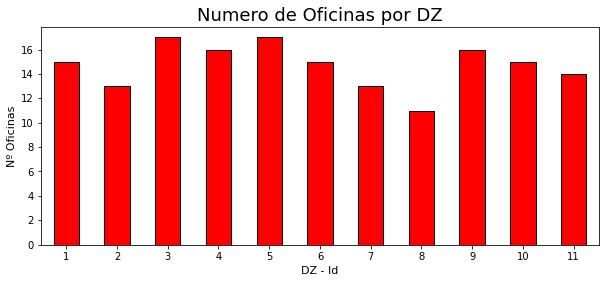

In [11]:
# Numero oficinas por cada Direccion de Zona
# El numero de oficinas / DZ depende de la ubicacion de las oficinas.

print('Numero de Oficinas por DZ: ',df.groupby('dz')['oficina'].nunique().sum())
print(df.groupby('dz')['oficina'].nunique())
numero_oficinas_por_dz = df.groupby('dz')['oficina'].nunique()
numero_oficinas_por_dz.plot(kind = 'bar', legend = '', grid = False, color = 'r', 
                                           rot = True, edgecolor = 'black',  linewidth=1, figsize = (10,4))
plt.title('Numero de Oficinas por DZ', fontsize = 18)
plt.xlabel('DZ - Id', fontsize = 11)
plt.ylabel('Nº Oficinas', fontsize = 11)
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Images/EDA-Numero de Oficinas por DZ.png', dpi=75,bbox_inches='tight')
plt.show()

### __Numero Clientes por cada Direccion de Zona__

Total Numero Clientes por DZ:  451374


count       11.000000
mean     41034.000000
std       8051.037175
min      21690.000000
25%      38337.500000
50%      42198.000000
75%      46634.500000
max      51468.000000
Name: cliente, dtype: float64

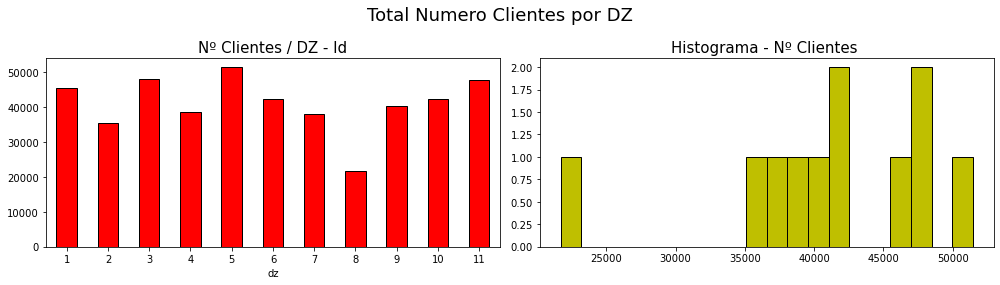

In [12]:
figure, axes = plt.subplots(1,2)
print('Total Numero Clientes por DZ: ', df['cliente'].nunique())

total_clients_per_dz = df.groupby('dz')['cliente'].nunique()


total_clients_per_dz.plot(ax = axes[0], kind = 'bar',legend = '',grid = False, color = 'r',
                            rot = True, edgecolor = 'black',linewidth = 1 , figsize = (14,4))


total_clients_per_dz.hist(grid = False, color = 'y', bins = 20, 
                                  edgecolor = 'black',linewidth = 1 , figsize = (14,4), 
                                  legend = '')

axes[0].set_title('Nº Clientes / DZ - Id', fontsize = 15)
axes[1].set_title('Histograma - Nº Clientes ', fontsize = 15)

plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Images/EDA-Total Numero Clientes por DZ.png', dpi=75,bbox_inches='tight')
plt.suptitle('Total Numero Clientes por DZ',fontsize = 18)
figure.tight_layout()
total_clients_per_dz.describe()


### __Clients per Office__

Total Clientes por Oficina:  451374


count     162.000000
mean     2786.259259
std      1025.420335
min      1185.000000
25%      2000.500000
50%      2619.500000
75%      3357.000000
max      5755.000000
Name: cliente, dtype: float64

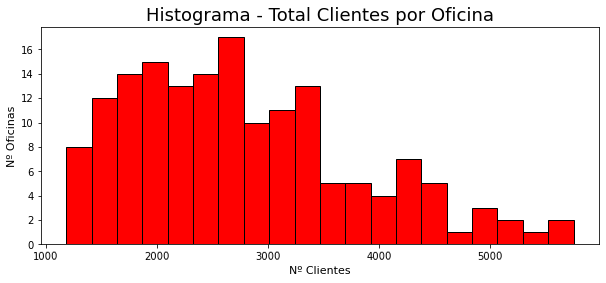

In [13]:
print('Total Clientes por Oficina: ', df['cliente'].nunique())
total_Clients_per_Office = df.groupby('oficina')['cliente'].nunique().sort_values(ascending = False)
total_Clients_per_Office.plot(kind = 'hist',legend = '', grid = False, color = 'r',
                            rot = True, edgecolor = 'black',linewidth = 1 , figsize = (10,4), bins = 20);
plt.title('Histograma - Total Clientes por Oficina', fontsize = 18)
plt.xlabel('Nº Clientes', fontsize = 11)
plt.ylabel('Nº Oficinas', fontsize = 11)
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Images/EDA-Total Clientes por Oficina.png', dpi=75,bbox_inches='tight')
df.groupby('oficina')['cliente'].nunique().describe()

### __Numero de Gestores por DZ__

Total Nº de Gestores:  458


count    11.000000
mean     45.818182
std       8.931049
min      25.000000
25%      41.500000
50%      48.000000
75%      52.500000
max      55.000000
Name: gestor, dtype: float64

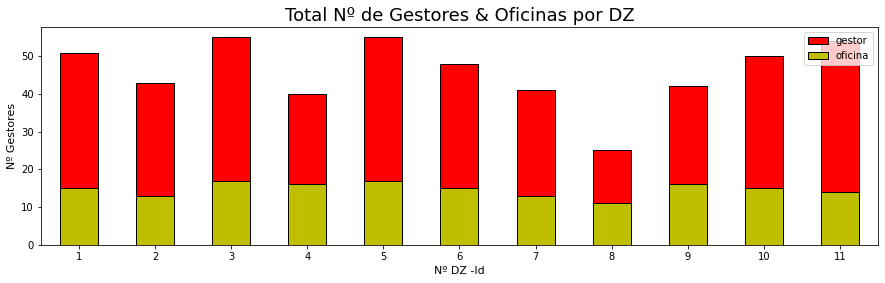

In [14]:
print('Total Nº de Gestores: ', df['gestor'].nunique())
figure, axes = plt.subplots(1,1)
consultants_per_of = df.groupby('dz')['oficina'].nunique()
consultants_per_dz = df.groupby('dz')['gestor'].nunique()
consultants_per_dz.plot( kind = 'bar',legend = 'Reverse',grid = False, color = 'r', 
                            rot = True, edgecolor = 'black',linewidth = 1)

consultants_per_of.plot(kind = 'bar',legend = 'Reverse',grid = False, color = 'y', 
                           rot = True, edgecolor = 'black',linewidth = 1, figsize = (15,4),
                          xlabel = 'Nº Direcciones de Zona - Nº Gestores');
plt.title('Total Nº de Gestores & Oficinas por DZ', fontsize = 18)
plt.xlabel('Nº DZ -Id', fontsize = 11)
plt.ylabel('Nº Gestores', fontsize = 11)
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Images/EDA-Total Nº de Gestores & Oficinas por DZ.png', dpi=75,bbox_inches='tight')
df.groupby('dz')['gestor'].nunique().describe()

============================================================================================================= 

=============================================================================================================

### Bloque 2  Variable Edad 

### __Edad de los clientes__

C:\Users\manue\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count    451374.000000
mean         58.268941
std          19.018368
min           0.000000
25%          45.000000
50%          60.000000
75%          73.000000
max         118.000000
Name: edad, dtype: float64

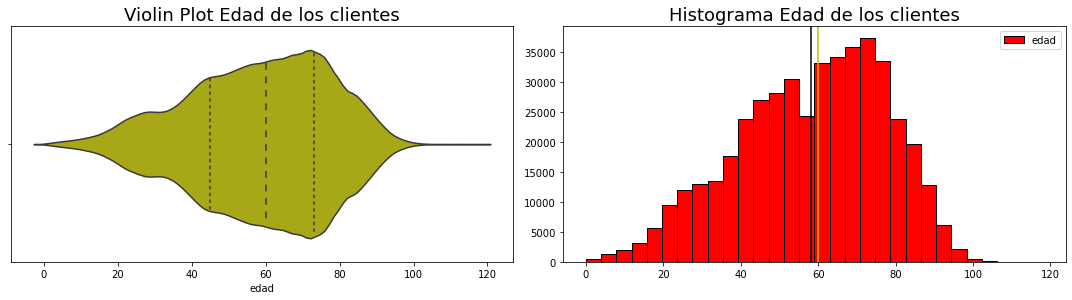

In [15]:
figure, axes = plt.subplots(1,2,figsize = (12,4))

variables_edad.hist(color = 'r', bins = 30, grid = False, edgecolor = 'black', 
                    legend = 'Reverse', linewidth = 1, figsize = (15,4));

sns.violinplot(variables_edad,ax = axes[0], color = 'y', inner="quartile")

plt.axvline(variables_edad.mean(), color='black')
plt.axvline(variables_edad.median(), color='y')
figure.tight_layout()

axes[0].set_title('Violin Plot Edad de los clientes', fontsize = 18)
axes[1].set_title('Histograma Edad de los clientes', fontsize = 18)

plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Images/EDA-Edad de los clientes.png', dpi=75,bbox_inches='tight')


variables_edad.describe()

### __Segmentacion de clientes por edades__

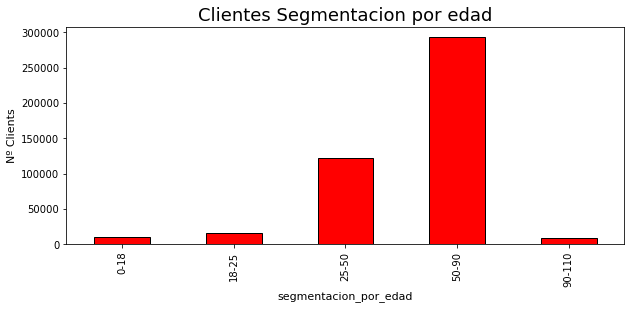

In [16]:
# Generamos una nueva variable de segmentacion de clientes por edades para ver los tramos de edad.
# Esta segmentacion sirve para una posible decision de eliminar de nuestro modelo a clientes de ciertos rangos.
# Clientes entre 0 y 20 años no es comun que dispongan de un seguro de hogar.
# Cliente > 90 años, dada su avanzada edad es habitual que sean los hijos quienes sean tomadores de los seguros.

df['segmentacion_por_edad'] = pd.cut(df.edad, bins = [0,18,25,50,90,110],
                     labels= ['0-18','18-25','25-50','50-90','90-110'])

segmentacion_por_edad = df['cliente'].groupby(df['segmentacion_por_edad']).count()

segmentacion_por_edad.plot(kind = 'bar', color = ('r'), grid = False, edgecolor = 'black', 
                           linewidth = 1, figsize = (10,4), fontsize = 10)
plt.title('Clientes Segmentacion por edad', fontsize = 18)
plt.xlabel('segmentacion_por_edad', fontsize = 11)
plt.ylabel('Nº Clients', fontsize = 11)
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Images/EDA-Clienes segmentacion_por_edad.png', dpi=75,bbox_inches='tight')
plt.show()


### __Resumen Conclusiones__

- De cara a nuestro modelo __eliminaremos a los clientes entre los rangos de edad 0-25 y 90 y superiores__.
- La realidad a la hora de contratar un seguro de hogar es que menores de edad y jovenes hasta los 25 años no contratan ya que sencillamente no disponen de vivienda propia.  
- En cuanto a los clientes de mas de 90 años, dada su avanzada edad, son los hijos quienes se hacen responsables de los seguros de hogar por lo que vamos a eliminarlos del modelo.

============================================================================================================= 

=============================================================================================================

### Bloque 3  Variables Ahorro - Financiacion

### __Variables Ahorro Financiacion 'saldo_captacion','saldo_financiacion','saldo_ffii','saldo_plp'__


### __Posibles Correlaciones entre las propias variables de ahorro financiacion__

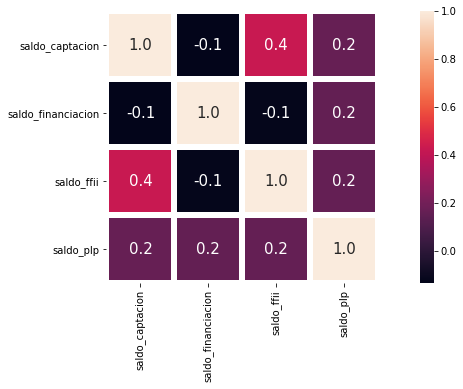

In [17]:
# No existen grandes correlaciones entre las propias variables.

import seaborn as sns
correlation_mat = variables_ahorro_financiacion.corr(method = 'spearman')
fig, ax = plt.subplots(figsize=(15,5)) 
sns.heatmap(correlation_mat, annot = True, square = True, 
            linewidths=5, fmt=".1f",annot_kws={'size':15},ax=ax)
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Images/EDA-Correlaciones Var_ahorro_fin.png', dpi=75,bbox_inches='tight')
plt.show()

### __Saldos Captacion__

Nº Clientes con saldos en cuenta:  436942
Nº Clientes con saldos > 1mm€:  215


count    4.513740e+05
mean     4.971455e+04
std      8.792364e+04
min     -5.104332e+04
25%      1.813182e+03
50%      1.520828e+04
75%      6.446964e+04
max      5.290216e+06
Name: saldo_captacion, dtype: float64

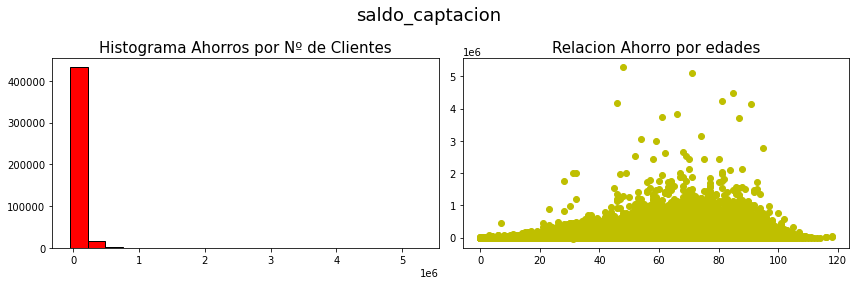

In [18]:
# Histograma arroja claramente que la mayoria de los clientes tiene saldos inferiores a los 100.000€
# Existen un numero pequeño de clientes cuyos saldos en cuenta ascienden a mas de 1mm€.
# La media de los saldos no llega a los 50.000€
# Colectivo dentro de una segmentacion de clase economica media.

figure, axes = plt.subplots(1,2,figsize = (12,4))
print('Nº Clientes con saldos en cuenta: ', df[df['saldo_captacion'] > 0 ]['cliente'].count())
print('Nº Clientes con saldos > 1mm€: ', df[df['saldo_captacion'] > 1e6 ]['cliente'].count())

df['saldo_captacion'].hist(ax = axes[0], color = 'r', bins = 20, grid = False, edgecolor = 'black', linewidth=1)
plt.scatter(df['edad'],df['saldo_captacion'],color = 'y');

axes[0].set_title('Histograma Ahorros por Nº de Clientes', fontsize = 15)
axes[1].set_title('Relacion Ahorro por edades', fontsize = 15)

plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Images/EDA-Saldos Captacion', dpi=75,bbox_inches='tight')
plt.suptitle('saldo_captacion',fontsize = 18)

figure.tight_layout()
df['saldo_captacion'].describe()

### __Saldos Financiacion__

Nº Clientes con Financiacions: 223894
Nº Clientes con Financiacion > 50.000€: 42860


count    4.513740e+05
mean     1.380668e+04
std      4.296438e+04
min     -4.900000e+03
25%      0.000000e+00
50%      0.000000e+00
75%      6.841775e+02
max      2.896317e+06
Name: saldo_financiacion, dtype: float64

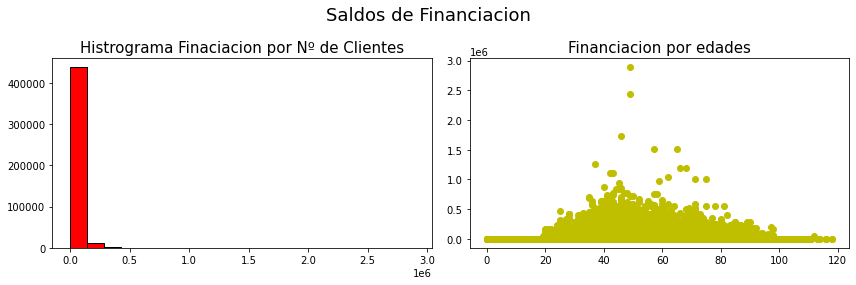

In [19]:
# Vemos de inicio que hay clientes con financiacion deudora (min = 4.900000e+03)
# Saldos medios de financiacion de 13.000€.  
# Colectivo con financiacion al consumo.

figure, axes = plt.subplots(1,2,figsize = (12,4))
print('Nº Clientes con Financiacions:',df[df['saldo_financiacion'] > 1]['cliente'].count())
print('Nº Clientes con Financiacion > 50.000€:',df[df['saldo_financiacion'] > 50000]['cliente'].count())

df['saldo_financiacion'].hist(ax = axes[0], color = 'r', bins = 20, grid = False, edgecolor = 'black', linewidth=1);
plt.scatter(df['edad'],df['saldo_financiacion'],color = 'y');

axes[0].set_title('Histrograma Finaciacion por Nº de Clientes', fontsize = 15)
axes[1].set_title('Financiacion por edades', fontsize = 15)

plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Images/EDA-Financiacion', dpi=75,bbox_inches='tight')
plt.suptitle('Saldos de Financiacion',fontsize = 18)

figure.tight_layout()
df['saldo_financiacion'].describe()

### __Fondos de Inversion__

Nº Clientes con Fondos Inversion:  60932
Nº Clientes con Fondos Inversion > 50.000€ :  23479


count    4.513740e+05
mean     8.483663e+03
std      3.844671e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.130940e+06
Name: saldo_ffii, dtype: float64

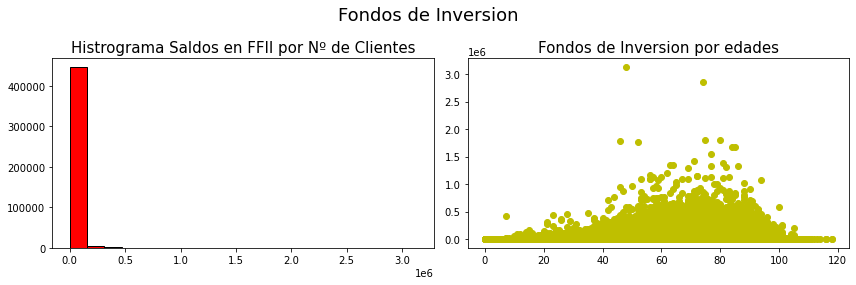

In [20]:
# Histograma arroja claramente que la mayoria de los clientes tiene saldos inferiores a los 100.000€
# Existen un numero pequeño de clientes cuyos saldos en cuenta ascienden a mas de 1mm€.
# La media de los saldos no llega a los 8.000€
# Metodo de ahorro no prioritario.

figure, axes = plt.subplots(1,2,figsize = (12,4))
print('Nº Clientes con Fondos Inversion: ', df[df['saldo_ffii'] > 0]['cliente'].count())
print('Nº Clientes con Fondos Inversion > 50.000€ : ', df[df['saldo_ffii'] > 50000]['cliente'].count())

df['saldo_ffii'].hist(ax = axes[0], color = 'r', bins = 20, grid = False, edgecolor = 'black', linewidth=1);
plt.scatter(df['edad'],df['saldo_ffii'],color = 'y');

axes[0].set_title('Histrograma Saldos en FFII por Nº de Clientes', fontsize = 15)
axes[1].set_title('Fondos de Inversion por edades', fontsize = 15)

plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Images/EDA-Fondos de Inversion', dpi=75,bbox_inches='tight')
plt.suptitle('Fondos de Inversion',fontsize = 18)

figure.tight_layout()
df['saldo_ffii'].describe()

### __Planes de Pension__

Nº Clientes sin Planes Pension 404808
Nº Clientes sin Planes Pension > 100.000€: 1262


count    451374.000000
mean       1728.478326
std       10780.622435
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      459937.460000
Name: saldo_plp, dtype: float64

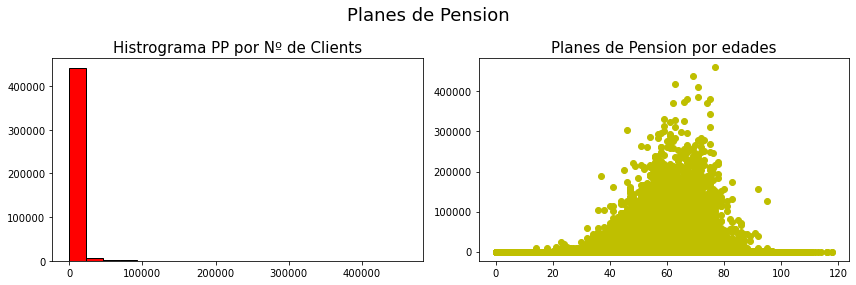

In [21]:
# Histograma arroja claramente que la mayoria de los clientes tiene saldos inferiores a los 100.000€
# Existen un numero pequeño de clientes cuyos saldos en cuenta ascienden a mas de 1mm€.
# La media de los saldos no llega a los 2.000€
# Metodo de prevision futuro no prioritario.

figure, axes = plt.subplots(1,2,figsize = (12,4))
print('Nº Clientes sin Planes Pension', df[df['saldo_plp'] == 0]['cliente'].count())
print('Nº Clientes sin Planes Pension > 100.000€:', df[df['saldo_plp'] > 1e5]['cliente'].count())

df['saldo_plp'].hist(ax = axes[0], color = 'r', bins = 20, grid = False, edgecolor = 'black', linewidth=1);
plt.scatter(df['edad'],df['saldo_plp'],color = 'y');

axes[0].set_title('Histrograma PP por Nº de Clients', fontsize = 15)
axes[1].set_title('Planes de Pension por edades', fontsize = 15)

plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Images/EDA-Planes de Pension', dpi=75,bbox_inches='tight')
plt.suptitle('Planes de Pension',fontsize = 18)

figure.tight_layout()
df['saldo_plp'].describe()

### __Resumen Conclusiones.__
    
      - Numero Total Clientes:  451374
      - Nº Clientes con saldos en cuenta:  436942
      - Nº Clientes con Financiacion: 223894
      - Nº Clientes sin Fondos Inversion:  390442
      - Nº Clientes sin Planes Pension: 404808

- En una primera visualizacion con los histogramas,  ya detectamos que en los 4 epigrafes la mayoria de los clientes tienden a saldos muy bajos.
- Los metodos de ahorro prevision y ahorro para la jubilacion no son los prioritarios de los clientes.
- En relacion a nuestro Tarhet, la realidad comercial es que el hecho de disponer saldos en __Fondos de Inversion o Planes de Pension__ no es una de las condiciones que lleven a los clientes a contratar o no un Seguro de Hogar. __Estas dos variables seran convertidas en variables categorias booleanas__. Los valores asignados seran 0 si no tiene y 1 si tiene. De esta  forma simplificaremos el estudio.  
- __Variable Captacion__.  Son valores reales. Solamente __modificaremos los negativos y les damos valor de la media__.
- En cuanto a la __financiacion__ vemos que hay un 50% de clientes que si disponen de financiacon. __Mantenemos la variable__ que puede ser util para el modelo. Clientes con saldos deudores les darmeos valor 0€

============================================================================================================= 

=============================================================================================================

### Bloque 4 Variables de Servicios

### __Domiciliacion de ingresos y recibos, tarjetas de credito y tenencia de App Internet__
Visualizamos cada una de las variables en dos aspectos; Histograma y en forma de Scatter combinadas con la variable Edad.

### __Posibles Correlaciones entre las propias variables de servicio__

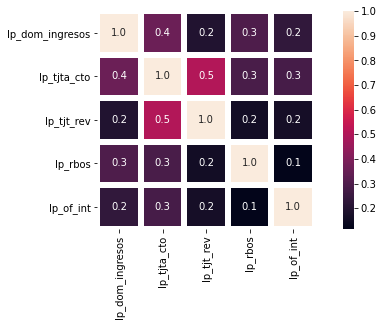

In [22]:
# Salvo en tarjetas de credito / revolvin no existen grandes correlaciones entre las propias variables.
correlation_mat = variables_servicio.corr(method = 'spearman')
fig, ax = plt.subplots(figsize=(10,4)) 
sns.heatmap(correlation_mat, annot = True, square = True, 
            linewidths=5, fmt=".1f",annot_kws={'size':10},ax=ax)
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Images/EDA-Correlaciones variables_servicio.png', dpi=75,bbox_inches='tight')
plt.show()

### __Domiciliacion de Nomina__

% Clientes con Ingresos 0.71
Empty DataFrame
Columns: [(lp_dom_ingresos, count), (lp_dom_ingresos, sum)]
Index: []


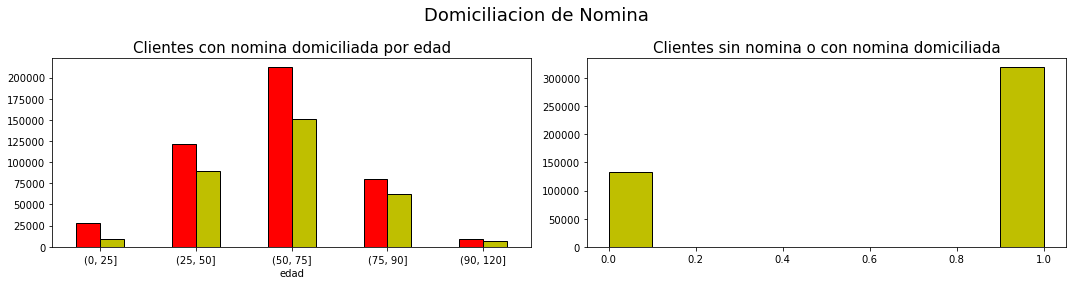

In [23]:
# Mayoria de los clientes con nomina o pension domiciliada entre 25 y 90 años.
# Buen porcentaje de clientes con domiciliacion de ingresos.

figure, axes = plt.subplots(1,2)
print ('% Clientes con Ingresos', df['lp_dom_ingresos'].value_counts(normalize = True)[1].round(2))
print(df.groupby(segmentacion_por_edad)[['lp_dom_ingresos']].agg(['count','sum']))

segmentacion_por_edad = pd.cut(df['edad'], bins=(0, 25, 50, 75, 90, 120))
df.groupby(segmentacion_por_edad)[['lp_dom_ingresos']].agg(['count','sum']).plot(ax = axes[0],kind ='bar',
                                    legend = '', grid = False, color = ('r','y'), rot = 0, 
                                     edgecolor = 'black', linewidth=1, figsize = (10,4))

df['lp_dom_ingresos'].hist(figsize = (15,4), color = 'y', edgecolor = 'black',  linewidth = 1, grid = False)

axes[0].set_title('Clientes con nomina domiciliada por edad', fontsize = 15)
axes[1].set_title('Clientes sin nomina o con nomina domiciliada', fontsize = 15)

plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Images/EDA-Domiciliacion de Nomina', dpi=75,bbox_inches='tight')
plt.suptitle('Domiciliacion de Nomina',fontsize = 18)
figure.tight_layout()


### __Domiciliacion de Recibos__

% Clientes con recibos domiciliados 0.87
          lp_rbos        
            count     sum
edad                     
(0, 25]     27661    9382
(25, 50]   121987  103084
(50, 75]   212315  196207
(75, 90]    80580   76691
(90, 120]    8818    8169


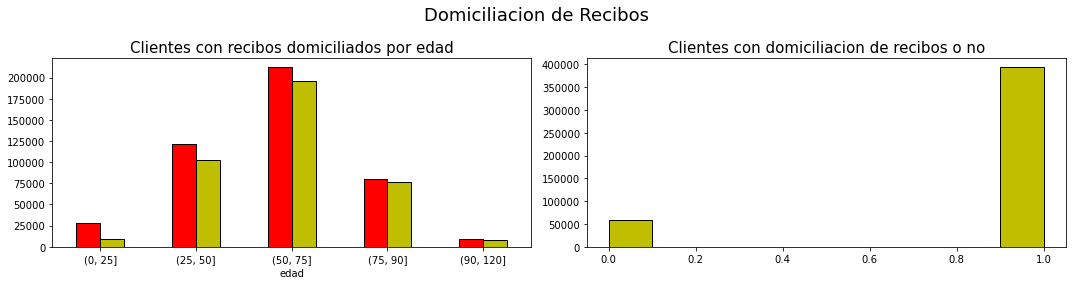

In [24]:
# Mayoria clientes con servicio domiciliacion de recibos.
# Alto Porcetaje de clientes con  el servicio.
# Acumulado en Clientes entre 25 y 90 años.

figure, axes = plt.subplots(1,2)
print ('% Clientes con recibos domiciliados',df['lp_rbos'].value_counts(normalize = True)[1].round(2))
print(df.groupby(segmentacion_por_edad)[['lp_rbos']].agg(['count','sum']))

segmentacion_por_edad = pd.cut(df['edad'], bins=(0, 25, 50, 75, 90, 120))
df.groupby(segmentacion_por_edad)[['lp_rbos']].agg(['count','sum']).plot(ax = axes[0],kind ='bar',
                                    legend = '', grid = False, color = ('r','y'), rot = 0, 
                                     edgecolor = 'black', linewidth=1, figsize = (10,4))

df['lp_rbos'].hist(figsize = (15,4), color = 'y', edgecolor = 'black',  linewidth = 1, grid = False)

axes[0].set_title('Clientes con recibos domiciliados por edad', fontsize = 15)
axes[1].set_title('Clientes con domiciliacion de recibos o no', fontsize = 15)

plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Images/EDA-Domiciliacion de Recibos', dpi=75,bbox_inches='tight')
plt.suptitle('Domiciliacion de Recibos',fontsize = 18)
figure.tight_layout()


### __Internet App__

% Clientes con App Internet 0.77
          lp_of_int        
              count     sum
edad                       
(0, 25]       27661   18593
(25, 50]     121987  112287
(50, 75]     212315  164809
(75, 90]      80580   49159
(90, 120]      8818    4138


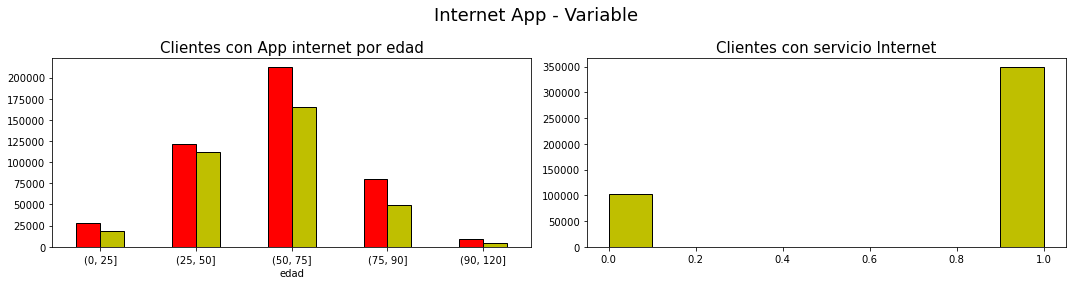

In [44]:
# Servicio de acceso via APP a posiciones de los clientes.
# Alto Porcetaje de clientes con  el servicio.
# Acumulado en Clientes entre 25 y 75 años.

figure, axes = plt.subplots(1,2)
print ('% Clientes con App Internet',df['lp_of_int'].value_counts(normalize = True)[1].round(2))
print(df.groupby(segmentacion_por_edad)[['lp_of_int']].agg(['count','sum']))

segmentacion_por_edad = pd.cut(df['edad'], bins=(0, 25, 50, 75, 90, 120))
df.groupby(segmentacion_por_edad)[['lp_of_int']].agg(['count','sum']).plot(ax = axes[0],kind ='bar',
                                    legend = '', grid = False, color = ('r','y'), rot = 0, 
                                     edgecolor = 'black', linewidth=1, figsize = (10,4))

df['lp_of_int'].hist(figsize = (15,4), color = 'y', edgecolor = 'black',  linewidth = 1, grid = False)

axes[0].set_title('Clientes con App internet por edad', fontsize = 15)
axes[1].set_title('Clientes con servicio Internet', fontsize = 15)

plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Images/EDA-Internet App', dpi=75,bbox_inches='tight')
plt.suptitle('Internet App - Variable',fontsize = 18)
figure.tight_layout()


### __Tarjeta de Credito__

% Clientes con Tarjeta de Credito 0.55
          lp_tjta_cto        
                count     sum
edad                         
(0, 25]         27661    2864
(25, 50]       121987   64390
(50, 75]       212315  137133
(75, 90]        80580   41694
(90, 120]        8818    2391


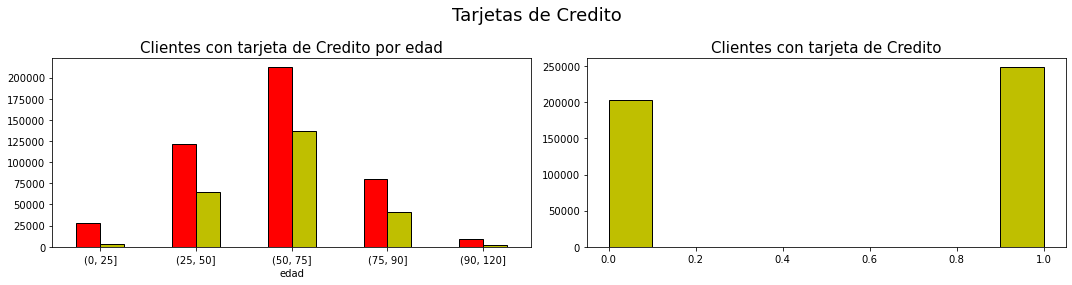

In [45]:
# 'Solo el 50% de los clientes disponen de Tjta de Credito'
# Medio de pago poco necesitado por este colectivo de clientes.

figure, axes = plt.subplots(1,2)
print ('% Clientes con Tarjeta de Credito', df['lp_tjta_cto'].value_counts(normalize = True)[1].round(2))
print(df.groupby(segmentacion_por_edad)[['lp_tjta_cto']].agg(['count','sum']))
segmentacion_por_edad = pd.cut(df['edad'], bins=(0, 25, 50, 75, 90, 120))

df.groupby(segmentacion_por_edad)[['lp_tjta_cto']].agg(['count','sum']).plot(ax = axes[0],kind ='bar',
                                    legend = '', grid = False, color = ('r','y'), rot = 0, 
                                     edgecolor = 'black', linewidth=1, figsize = (10,4))

df['lp_tjta_cto'].hist(figsize = (15,4), color = 'y', edgecolor = 'black',  linewidth = 1, grid = False)

axes[0].set_title('Clientes con tarjeta de Credito por edad', fontsize = 15)
axes[1].set_title('Clientes con tarjeta de Credito', fontsize = 15)

plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Images/EDA-Tarjetas de Credito', dpi=75,bbox_inches='tight')
plt.suptitle('Tarjetas de Credito',fontsize = 18)

figure.tight_layout()


### __Tarjeta Credito Revolving__

% Clients with Revolving Credit Card 0.24
          lp_tjt_rev       
               count    sum
edad                       
(0, 25]        27661    994
(25, 50]      121987  26939
(50, 75]      212315  59209
(75, 90]       80580  19130
(90, 120]       8818    964


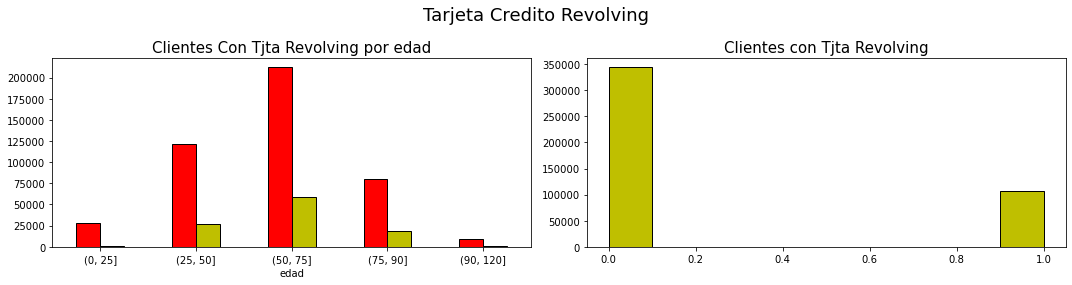

In [46]:
# Tarjeta muy parecida a la Tarjeta de Credito. 
# 'Solo el 25% de los clientes disponen de Tjta de Credito'
# Medio de pago poco necesitado por este colectivo de clientes.

figure, axes = plt.subplots(1,2)
print ('% Clients with Revolving Credit Card', df['lp_tjt_rev'].value_counts(normalize = True)[1].round(2))
print(df.groupby(segmentacion_por_edad)[['lp_tjt_rev']].agg(['count','sum']))
segmentacion_por_edad = pd.cut(df['edad'], bins=(0, 25, 50, 75, 90, 120))

df.groupby(segmentacion_por_edad)[['lp_tjt_rev']].agg(['count','sum']).plot(ax = axes[0],kind ='bar',
                                    legend = '', grid = False, color = ('r','y'), rot = 0, 
                                     edgecolor = 'black', linewidth=1, figsize = (10,4))

df['lp_tjt_rev'].hist(figsize = (15,4), color = 'y', edgecolor = 'black',  linewidth = 1, grid = False)

axes[0].set_title('Clientes Con Tjta Revolving por edad', fontsize = 15)
axes[1].set_title('Clientes con Tjta Revolving', fontsize = 15)

plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Images/EDA-Tarjeta Revol', dpi=75,bbox_inches='tight')
plt.suptitle('Tarjeta Credito Revolving',fontsize = 18)
figure.tight_layout()


### __Resumen Conclusiones.__

INFORMACION VARIABLES SERVICIOS

    - Clientes con Ingresos 0.71%
    - Clientes con Tjta Cto 0.55%
    - Clientes con Tjta Rev 0.24%
    - Clientes con Rbos domiciliados 0.87%
    - Clientes con Servicio Internet 0.77%

- __Dentro de este bloque no vamos a eliminar ninguna variable para el estudio de nuestro modelo. Todas pueden ser relevantes.__

- Los dos servicios mas importantes Domiciliacion de Ingresos y recibos acumulan buenos % de contratacion.
- Viendo los % de tenencia de estos servicios se observa una gran potencial comercial.

============================================================================================================= 

=============================================================================================================

### Bloque 5 Variables de Seguros
Visualizamos cada una de las variables en dos aspectos; Histograma y  combinadas con la variable Edad para ver cuantos clientes dentro de cada uno de los segmentos de edad, tienen seguros.


## __Seguros de Hogar - Vida - Accidentes - Auto - Salud__

### __Posibles Correlaciones entre las propias variables de seguros__

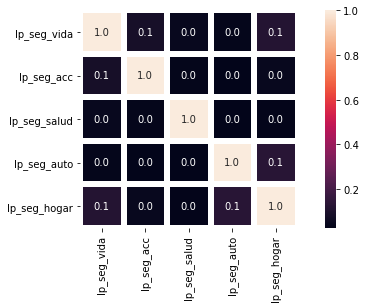

In [47]:
# Nula correlaciones entre las propias variables.

correlation_mat = variables_seguros.corr(method = 'spearman')
fig, ax = plt.subplots(figsize=(10,4)) 
sns.heatmap(correlation_mat, annot = True, square = True, 
            linewidths=5, fmt=".1f",annot_kws={'size':10},ax=ax)
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Images/EDA-Correlaciones Seguros de riesgo', dpi=75,bbox_inches='tight')
plt.show()

## __Seguros de Vida__

% Clientes con seguro de vidae 0.08
          lp_seg_vida       
                count    sum
edad                        
(0, 25]         27661    967
(25, 50]       121987  24373
(50, 75]       212315  12515
(75, 90]        80580      1
(90, 120]        8818      0


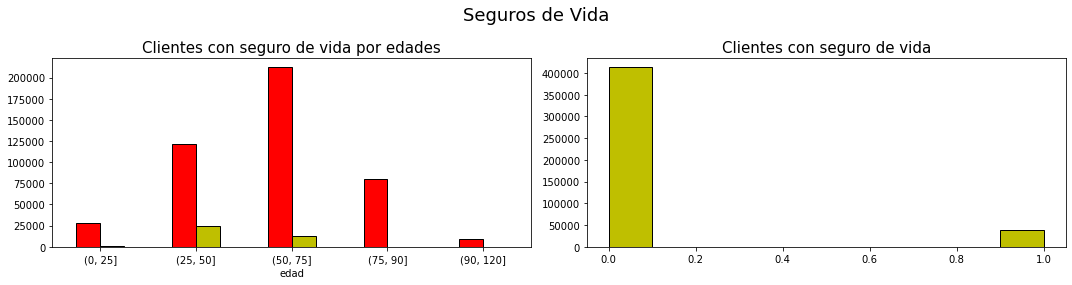

In [25]:
# Mayoria de clientes sin seguro contrado.

figure, axes = plt.subplots(1,2)
print('% Clientes con seguro de vidae',df['lp_seg_vida'].value_counts(normalize = True)[1].round(2))
print(df.groupby(segmentacion_por_edad)[['lp_seg_vida']].agg(['count','sum']))
segmentacion_por_edad = pd.cut(df['edad'], bins=(0, 25, 50, 75, 90, 120))

df.groupby(segmentacion_por_edad)[['lp_seg_vida']].agg(['count','sum']).plot(ax = axes[0],kind ='bar',
                                    legend = '', grid = False, color = ('r','y'), rot = 0, 
                                     edgecolor = 'black', linewidth=1, figsize = (12,4))

df['lp_seg_vida'].hist(ax = axes[1],figsize = (15,4), color = 'y', edgecolor = 'black',  linewidth = 1, grid = False)

axes[0].set_title('Clientes con seguro de vida por edades', fontsize = 15)
axes[1].set_title('Clientes con seguro de vida', fontsize = 15)

plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Images/EDA-Seguro de Vida', dpi=75,bbox_inches='tight')
plt.suptitle('Seguros de Vida',fontsize = 18)
figure.tight_layout()

## __Seguros de Accidentes__

% Clientes con Seguro de Accidentes 0.02
          lp_seg_acc      
               count   sum
edad                      
(0, 25]        27661    86
(25, 50]      121987  2867
(50, 75]      212315  6035
(75, 90]       80580    38
(90, 120]       8818     0


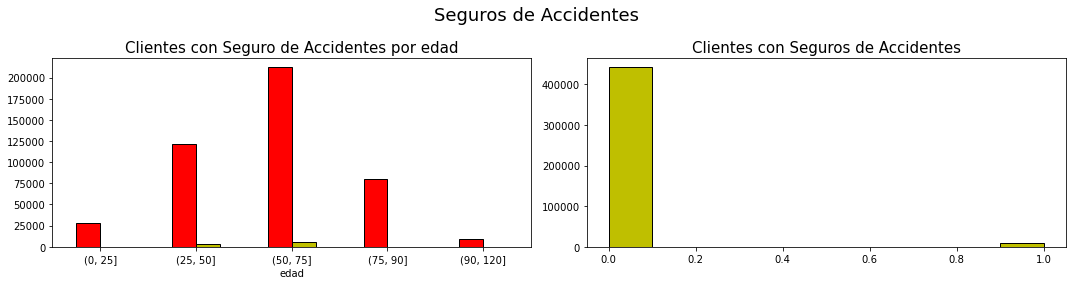

In [26]:
# Mayoria de clientes sin seguro contrado.

figure, axes = plt.subplots(1,2)
print('% Clientes con Seguro de Accidentes',df['lp_seg_acc'].value_counts(normalize = True)[1].round(2))
print(df.groupby(segmentacion_por_edad)[['lp_seg_acc']].agg(['count','sum']))

segmentacion_por_edad = pd.cut(df['edad'], bins=(0, 25, 50, 75, 90, 120))
df.groupby(segmentacion_por_edad)[['lp_seg_acc']].agg(['count','sum']).plot(ax = axes[0],kind ='bar',
                                    legend = '', grid = False, color = ('r','y'), rot = 0, 
                                     edgecolor = 'black', linewidth=1, figsize = (10,4))

df['lp_seg_acc'].hist(ax = axes[1],figsize = (15,4), color = 'y',edgecolor = 'black',  linewidth = 1, grid = False)

axes[0].set_title('Clientes con Seguro de Accidentes por edad', fontsize = 15)
axes[1].set_title('Clientes con Seguros de Accidentes', fontsize = 15)

plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Images/EDA-Seguros Accidentes', dpi=75,bbox_inches='tight')
plt.suptitle('Seguros de Accidentes',fontsize = 18)
figure.tight_layout()

## __Seguros de Salud__

% Clientes con Seguro de Salud  0.0
          lp_seg_salud      
                 count   sum
edad                        
(0, 25]          27661    53
(25, 50]        121987   793
(50, 75]        212315  1003
(75, 90]         80580    75
(90, 120]         8818     0


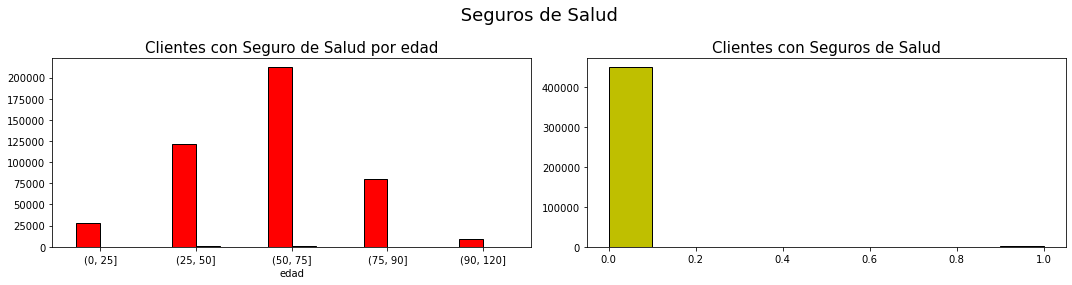

In [27]:
# Mayoria de clientes sin seguro contrado.

figure, axes = plt.subplots(1,2)
print('% Clientes con Seguro de Salud ',df['lp_seg_salud'].value_counts(normalize = True)[1].round(2))
print(df.groupby(segmentacion_por_edad)[['lp_seg_salud']].agg(['count','sum']))

segmentacion_por_edad = pd.cut(df['edad'], bins=(0, 25, 50, 75, 90, 120))
df.groupby(segmentacion_por_edad)[['lp_seg_salud']].agg(['count','sum']).plot(ax = axes[0],kind ='bar',
                                    legend = '', grid = False, color = ('r','y'), rot = 0, 
                                     edgecolor = 'black', linewidth=1, figsize = (10,4))

df['lp_seg_salud'].hist(ax = axes[1],figsize = (15,4), color = 'y', edgecolor = 'black',  linewidth = 1, grid = False)

axes[0].set_title('Clientes con Seguro de Salud por edad', fontsize = 15)
axes[1].set_title('Clientes con Seguros de Salud', fontsize = 15)

plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Images/EDA- Seguros de Salud', dpi=75,bbox_inches='tight')
plt.suptitle(' Seguros de Salud',fontsize = 18)
figure.tight_layout()

## __Seguro de Coche__

% Clients with Car insurance 0.01
          lp_seg_auto      
                count   sum
edad                       
(0, 25]         27661     9
(25, 50]       121987  1482
(50, 75]       212315  3762
(75, 90]        80580   974
(90, 120]        8818     5


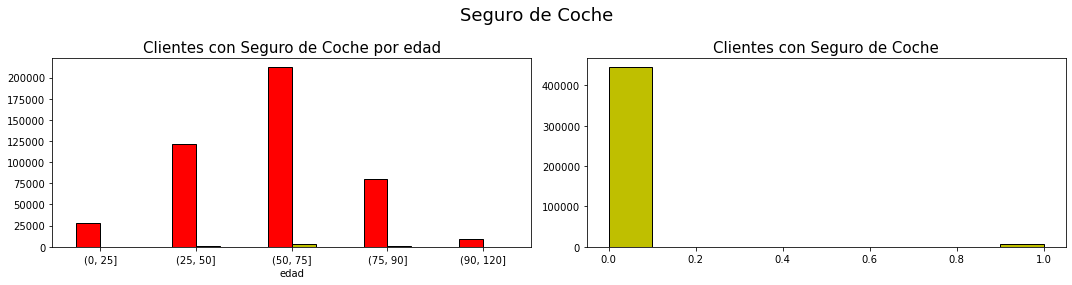

In [51]:
# Mayoria de clientes sin seguro contrado.

figure, axes = plt.subplots(1,2)
print('% Clients with Car insurance',df['lp_seg_auto'].value_counts(normalize = True)[1].round(2))
print(df.groupby(segmentacion_por_edad)[['lp_seg_auto']].agg(['count','sum']))

segmentacion_por_edad = pd.cut(df['edad'], bins=(0, 25, 50, 75, 90, 120))
df.groupby(segmentacion_por_edad)[['lp_seg_auto']].agg(['count','sum']).plot(ax = axes[0],kind ='bar',
                                    legend = '', grid = False, color = ('r','y'), rot = 0, 
                                     edgecolor = 'black', linewidth=1, figsize = (10,4))

df['lp_seg_auto'].hist(ax = axes[1],figsize = (15,4), color = 'y',edgecolor = 'black',  linewidth = 1, grid = False)

axes[0].set_title('Clientes con Seguro de Coche por edad', fontsize = 15)
axes[1].set_title('Clientes con Seguro de Coche', fontsize = 15)

plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Images/EDA-Seguro de Coche', dpi=75,bbox_inches='tight')
plt.suptitle('Seguro de Coche',fontsize = 18)
figure.tight_layout()

## __Seguro de Hogar - TARGET__

% Clientes con Seguro Hogar 0.13 --TARGET
          lp_seg_hogar       
                 count    sum
edad                         
(0, 25]          27661     78
(25, 50]        121987  15337
(50, 75]        212315  27874
(75, 90]         80580  14217
(90, 120]         8818   1305


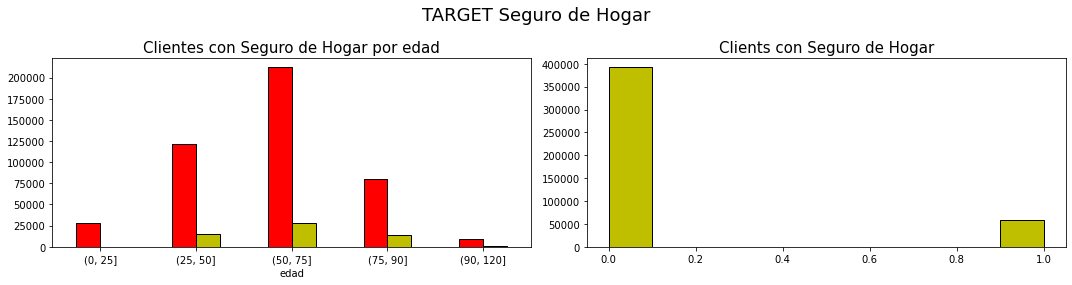

In [53]:
# Mayoria de clientes sin seguro contrado.

figure, axes = plt.subplots(1,2)
print('% Clientes con Seguro Hogar',df['lp_seg_hogar'].value_counts(normalize = True)[1].round(2), '--TARGET')
print(df.groupby(segmentacion_por_edad)[['lp_seg_hogar']].agg(['count','sum']))

segmentacion_por_edad = pd.cut(df['edad'], bins=(0, 25, 50, 75, 90, 120))
df.groupby(segmentacion_por_edad)[['lp_seg_hogar']].agg(['count','sum']).plot(ax = axes[0],kind ='bar',
                                    legend = '', grid = False, color = ('r','y'), rot = 0, 
                                     edgecolor = 'black', linewidth=1, figsize = (10,4))

df['lp_seg_hogar'].hist(ax = axes[1],figsize = (15,4), color = 'y', edgecolor = 'black',  linewidth = 1, grid = False)

axes[0].set_title('Clientes con Seguro de Hogar por edad', fontsize = 15)
axes[1].set_title('Clients con Seguro de Hogar', fontsize = 15)

plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/images/EDA-Seguro de Hogar', dpi=75,bbox_inches='tight')
plt.suptitle('TARGET Seguro de Hogar',fontsize = 18)
figure.tight_layout()

__Conclusiones.__



    - % Clientes con Seguro Vida 0.08
    - % Clientes con Seguro Accidentes 0.02
    - % Clientes con Seguro Salud 0.0
    - % Clientes con Seguro Auto 0.01
    - % Clientes con Seguro Hogar 0.13 --TARGET

- Vemos como la mayoria de los clientes no tienen Seguros contratados.
- Se trata de una verdadera oportunidad comercial ya que la realidad es que en cualquier casa o familia  lo normal es que haya uno o dos vehiculos, el/la cabeza de familiar disponga de un seguro de vida o se disponga a nivel familiar de un seguro de salud.  Este bajisimo porcentaje de tenecia de seguros indica que seguramente los tengan en otra entidad financiera o aseguradora. 
- Todos los seguros seran utilizados dentro del modelo.


============================================================================================================= 

=============================================================================================================

###  Bloque 6 Variables Segmentacion

__Carterizacion de los clientes - recorrido comercial - Segmentacion Internet__

__Conclusiones.__

- 90 % Clientes carterizados - Eliminamos del modelo
- Ningun cliente BBP - Eliminamos del modelo
- Resto de variables mantenemos y transformaremos con Label Encoder a variable numerica para poder utilizarlos en nuestro modelo.

In [54]:
print('VARIABLES DE SEGMENTACION')
print('====================================')
for variable in variables_segmentacion:
    print(variable.upper(),':::')
    print(df[variable].value_counts(normalize = True))
    print('------------------------------------')

VARIABLES DE SEGMENTACION
ESTA_CARTERIZADO :::
SI    0.904416
NO    0.095584
Name: esta_carterizado, dtype: float64
------------------------------------
CLIENTE_BBP :::
NO    1.0
Name: cliente_bbp, dtype: float64
------------------------------------
TIPO_GESTOR :::
ASESOR FINANCIERO          0.894690
SIN GESTOR                 0.095584
SUBDIRECCIÓN DE OFICINA    0.009726
Name: tipo_gestor, dtype: float64
------------------------------------
CARTERA_PATRON :::
ASESORAMIENTO FINANCIERO    0.697767
TUTELA                      0.206649
SIN CARTERA                 0.095584
Name: cartera_patron, dtype: float64
------------------------------------
MARCA_BP :::
NO    0.720633
SI    0.279367
Name: marca_bp, dtype: float64
------------------------------------
MARCA_CCTE :::
AF           0.612485
SIN MARCA    0.270126
CCTE         0.117388
Name: marca_ccte, dtype: float64
------------------------------------
SEG_VALOR :::
ALTO     0.552963
MEDIO    0.298890
BAJO     0.148148
Name: seg_valor, dtyp

============================================================================================================= 

=============================================================================================================

#  ESTUDIO IMPORTANCIA DE LAS VARIABLES

__Vamos a buscar de forma grafica las posibles correlaciones que pueda haber entre las variables__. 


### Estudio Importancia con RandomForest

In [57]:
#Leemos la base de datos y asociamos a la variable df el data set
df = pd.read_csv('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Cleanning & Merging/df_cleanned.csv')

In [58]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()

In [59]:
variables_segmentacion = df[['cartera_patron','marca_bp','marca_ccte','seg_valor','seg_recorrido',
                        'esta_carterizado','tipo_gestor','digital_3_meses','camino_digital']]

In [60]:
for segmento in variables_segmentacion:
    df[segmento]=lbl.fit_transform(df[segmento])

In [61]:
df.head(5)

,cliente,saldo_captacion,esta_carterizado,cliente_bbp,tipo_gestor,gestor,cartera_patron,codigo_cartera,digital_3_meses,camino_digital,...,edad,seg_valor,seg_recorrido,dz,oficina,lp_seg_vida,lp_seg_acc,lp_seg_salud,lp_seg_hogar,lp_seg_auto
0,1,1328106.49,1,NO,0,18287.0,0,14881.0,1,0,...,69.0,0,1,2,210,0,0,0,1,0
1,2,1142234.34,1,NO,0,18287.0,0,14881.0,1,0,...,81.0,0,0,2,210,0,0,0,0,0
2,3,1142234.34,1,NO,0,18287.0,2,28332.0,0,3,...,75.0,0,1,2,210,0,0,0,0,0
3,4,1340503.88,1,NO,0,41475.0,0,14204.0,0,3,...,94.0,0,1,2,210,0,0,0,0,0
4,5,1758517.70,1,NO,0,39000.0,0,14219.0,1,0,...,64.0,0,1,2,210,0,0,0,0,0


In [63]:
# Eliminamos variables de unidad de negocio y mantenemos el resto para el estudio.
df = df[['edad','saldo_captacion','saldo_financiacion','saldo_ffii','saldo_plp',
              'lp_dom_ingresos','lp_tjta_cto','lp_tjt_rev','lp_rbos','lp_of_int',
              'cartera_patron','marca_bp','marca_ccte','seg_valor','seg_recorrido',
              'esta_carterizado','tipo_gestor','digital_3_meses','camino_digital',
              'lp_seg_vida','lp_seg_acc','lp_seg_salud','lp_seg_auto','lp_seg_hogar']]

In [64]:
X = df.drop(['lp_seg_hogar'], axis = 1)
y= df['lp_seg_hogar']
print('Datos X =', X.size, X.shape)
print('Datos y =', y.size, y.shape)

Datos X = 10381602 (451374, 23)
Datos y = 451374 (451374,)


In [65]:
from sklearn.model_selection import train_test_split
test_size = 0.2
seed = 47
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

 1) saldo_captacion                0.279079
 2) saldo_financiacion             0.169123
 3) edad                           0.154577
 4) seg_valor                      0.076552
 5) saldo_ffii                     0.054786
 6) saldo_plp                      0.053133
 7) lp_dom_ingresos                0.026537
 8) camino_digital                 0.024198
 9) seg_recorrido                  0.022719
10) marca_ccte                     0.021080
11) lp_seg_vida                    0.018652
12) lp_seg_auto                    0.013138
13) cartera_patron                 0.012169
14) marca_bp                       0.012156
15) lp_tjta_cto                    0.011191
16) lp_tjt_rev                     0.010838
17) lp_seg_acc                     0.010216
18) digital_3_meses                0.007651
19) lp_rbos                        0.007175
20) lp_of_int                      0.006659
21) tipo_gestor                    0.003427
22) lp_seg_salud                   0.003167
23) esta_carterizado            

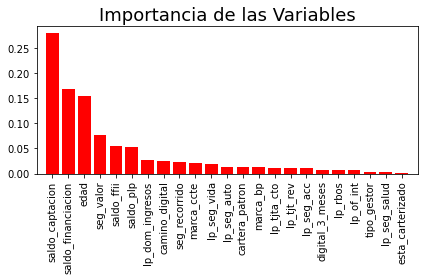

In [66]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
caracteristicas = df.columns[:-1]
forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)
forest.fit(X_train, y_train)
importancia = forest.feature_importances_
indices = np.argsort(importancia)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            caracteristicas[indices[f]], 
                            importancia[indices[f]]))

plt.title('Importancia de las Variables',fontsize = 18)
plt.bar(range(X_train.shape[1]), 
        importancia[indices],
        align='center',color = 'r')

plt.xticks(range(X_train.shape[1]), 
           caracteristicas[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Images/EDA-Importancia de las Variables', dpi=100,bbox_inches='tight')
plt.tight_layout()

plt.show()

We look graphically for possible correlations between the variables. 


###  Correlaciones entre Variables (con variables de segmento)

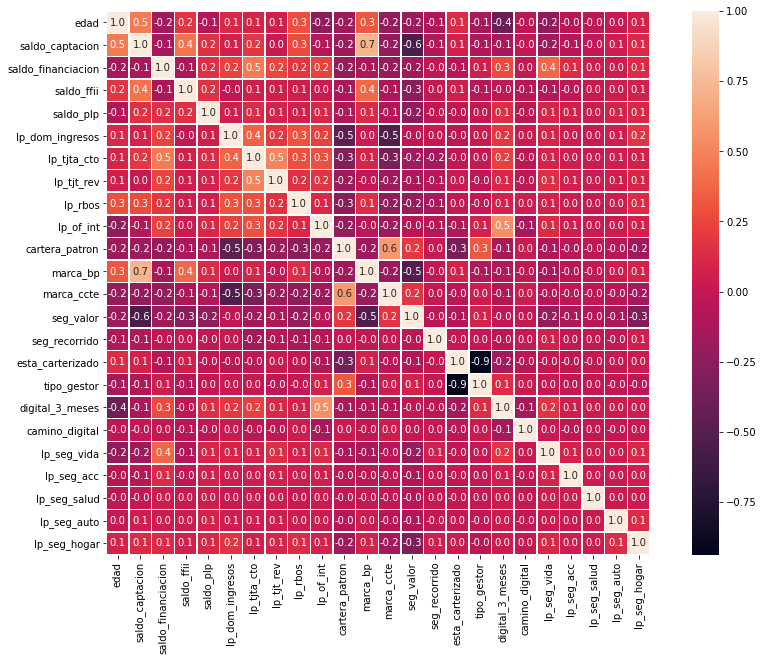

In [68]:
import seaborn as sns
correlation_mat = df.corr(method = 'spearman')
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(correlation_mat, annot = True, square = True, 
            linewidths=.5, fmt=".1f",annot_kws={'size':10},ax=ax)
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Images/EDA- Correlationes Todas', dpi=75,bbox_inches='tight')
plt.show()


__Conclusiones.__

- Utilizamos tabla de correlaciones con metodo spearman cuyo resultado arroja mayores correlaciones que los otros metodos
- La correlacion entre las variables es en general baja. Hay incluso correlaciones negativas pero tambien bajas
- Variables de Unidad de negocio no se han utilizado.
- Variables que eliminamos del modelo por baja importancia.
    - 18) digital_3_meses         0.007651
    - 19) lp_rbos                 0.007175
    - 20) lp_of_int                      0.006659
    - 21) tipo_gestor                    0.003427
    - 22) lp_seg_salud                   0.003167
    - 23) esta_carterizado               0.001778
- Variables que eliminamos del modelo por correlacion alta con otras variables.
    - 13) cartera_patron                 0.012169  Correlacion con 10) marca_ccte                     0.021080

============================================================================================================= 

=============================================================================================================

## __ESTUDIO DEL TARGET __Seguro_Hogar____

__Estudiamos nuestro Taarget__

- Que estructura tiene el Target 
- Son importantes todas las variables 
- Como se relaciona con el resto de variables
- Podemos descartar alguna variable de cara al modelo ?

In [69]:
#Leemos la base de datos y asociamos a la variable df el data set
df = pd.read_csv('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Cleanning & Merging/df_cleanned.csv')

## Estructura de Target

In [70]:
# Variable Binaria.  1 Tiene Seguro - 0 No tiene Seguro
df['lp_seg_hogar'].unique()

array([1, 0], dtype=int64)

## __Correlacion Seguro de hogar con todas las variables__

lp_seg_hogar          1.000000
lp_dom_ingresos       0.177929
lp_rbos               0.133464
lp_seg_auto           0.132036
saldo_captacion       0.127449
saldo_financiacion    0.123231
lp_seg_vida           0.118517
saldo_plp             0.115034
lp_tjt_rev            0.106714
edad                  0.087744
lp_of_int             0.082749
saldo_ffii            0.075671
lp_tjta_cto           0.070634
lp_seg_acc            0.048611
lp_seg_salud          0.031651
gestor                0.007628
dz                   -0.032331
oficina              -0.033456
cliente              -0.039775
codigo_cartera       -0.080364
Name: lp_seg_hogar, dtype: float64


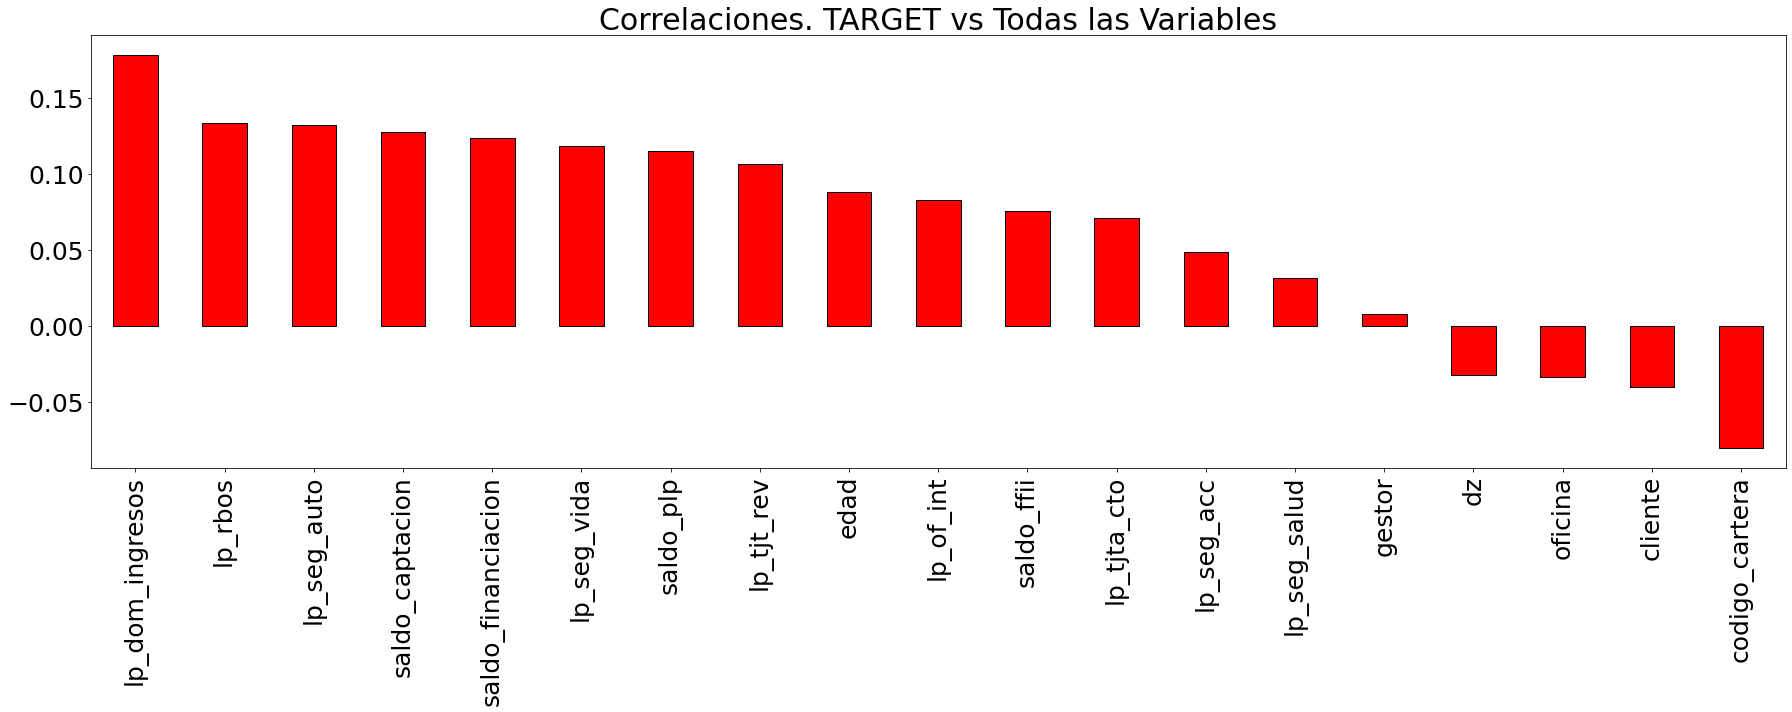

In [71]:
correlation_mat = df.corr(method = 'spearman')
corr_pairs = correlation_mat['lp_seg_hogar'].sort_values(ascending = False)
print(corr_pairs)
corr_pairs[1:].plot(kind ='bar',grid = False, color = 'r',edgecolor = 'black', linewidth=1,
                             rot = 90, figsize = (25,10), fontsize = 25)

plt.title('Correlaciones. TARGET vs Todas las Variables', fontsize = 30)

plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Images/EDA-Correlationes TARGET vs Todas.png', dpi=75,bbox_inches='tight')

plt.tight_layout()
plt.show()

## __Desbalanceo del Target__

Seguro de Hogar
% Clientes con Seguro de Hogar 0.13 --TARGET


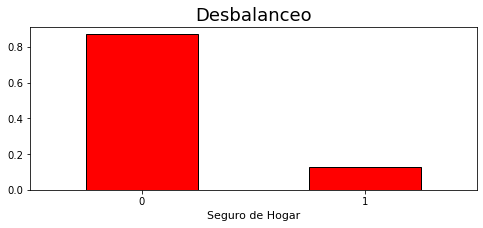

In [72]:
# Ploteamos el desbalanceo de la variable Target para una mejor visualizacion
# Vemos % y numero de clientes
# Target claramente desbalanceado. En nuestro modelo se debera tener en cuenta.

seguro_hogar = pd.value_counts(df['lp_seg_hogar'], sort = True, normalize = True)
print ('Seguro de Hogar')
seguro_hogar.plot(kind = 'bar', rot = 0, color = 'r' ,edgecolor = 'black', linewidth=1, figsize = (8,3))
print('% Clientes con Seguro de Hogar',df['lp_seg_hogar'].value_counts(normalize = True)[1].round(2), '--TARGET')

plt.title('Desbalanceo', fontsize = 18)
plt.xlabel('Seguro de Hogar',fontsize = 11)
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Images/EDA-TARGET Desbalanceo.png', dpi=75,bbox_inches='tight')
plt.show()


## __Clientes con Seguro de Hogar por DZ__

In [73]:
#Leemos la base de datos y asociamos a la variable df el data set
df = pd.read_csv('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Cleanning & Merging/df_cleanned.csv')

Total Clientes con Seguro de Hogar
0    392563
1     58811
Name: lp_seg_hogar, dtype: int64


count      11.000000
mean     5346.454545
std      1523.625568
min      2274.000000
25%      4436.000000
50%      5957.000000
75%      6350.000000
max      7233.000000
Name: lp_seg_hogar, dtype: float64

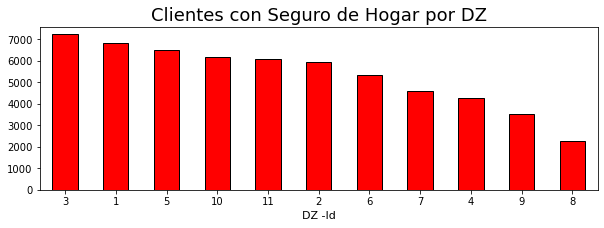

In [75]:
seguro_hogar_por_dz= df.groupby('dz')['lp_seg_hogar'].sum().sort_values(ascending = False)
seguro_hogar_por_dz.plot(kind ='bar',legend = '',grid = False, color = 'r',
                             rot = 0, edgecolor = 'black', linewidth=1, figsize = (10,3))

print ('Total Clientes con Seguro de Hogar')
print (pd.value_counts(df['lp_seg_hogar']))

plt.title('Clientes con Seguro de Hogar por DZ', fontsize = 18)
plt.xlabel('DZ -Id',fontsize = 11)
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Images/EDA-Clientes con Seguro de Hogar por DZ.png', dpi=75,bbox_inches='tight')

seguro_hogar_por_dz.describe()

## __Clientes con Seguro de Hogar segun las edades__

          lp_seg_hogar       
                 count    sum
edad                         
(0, 25]          27661     78
(25, 50]        121987  15337
(50, 75]        212315  27874
(75, 90]         80580  14217
(90, 120]         8818   1305


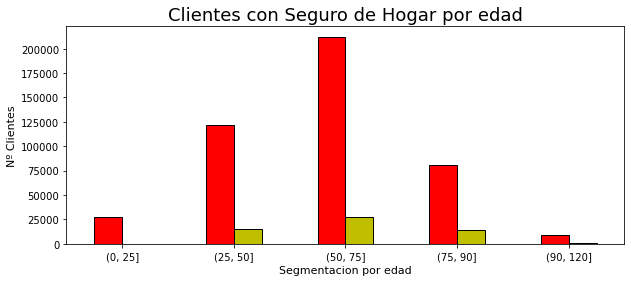

In [76]:
## Count refleja el Numero total de clientes en el segmento edad
# Sum refleja Numero de clientes con Seguro de Hogar
# En el modelo eliminamos clientes de 0-25 añios y >  90 años por no tener representacion en el seguro de hogar.

segmentacion_por_edad = pd.cut(df['edad'], bins=(0, 25, 50, 75, 90, 120))
print(df.groupby(segmentacion_por_edad)[['lp_seg_hogar']].agg(['count','sum']))

df.groupby(segmentacion_por_edad)[['lp_seg_hogar']].agg(['count','sum']).plot(kind ='bar',legend = '',
                     grid = False, color = ('r','y'), rot = 0, edgecolor = 'black', linewidth=1, figsize = (10,4))

plt.title('Clientes con Seguro de Hogar por edad', fontsize = 18)
plt.ylabel('Nº Clientes',fontsize = 11)
plt.xlabel('Segmentacion por edad',fontsize = 11)
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Images/EDA-Clientes con Seguro de Hogar por edad.png', dpi=75,bbox_inches='tight')
plt.show()


## __Clientes segun cartera con seguro de hogar__

tipo_gestor              lp_seg_hogar
ASESOR FINANCIERO        0               349347
                         1                54493
SIN GESTOR               0                39209
                         1                 3935
SUBDIRECCIÓN DE OFICINA  0                 4007
                         1                  383
Name: cliente, dtype: int64


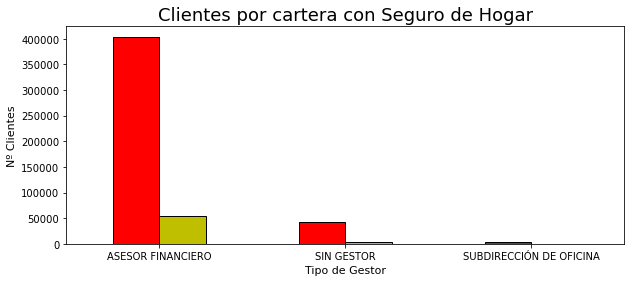

In [81]:
seguro_de_hogar_por_tipo_gestor = df.groupby('tipo_gestor')['lp_seg_hogar'].agg(['count','sum'])
print(df.groupby(['tipo_gestor', 'lp_seg_hogar'])['cliente'].nunique())
seguro_de_hogar_por_tipo_gestor.plot(kind ='bar',legend = '',grid = False, 
                                     color = ('r','y'), rot = 0, edgecolor = 'black', 
                                     linewidth=1, figsize = (10,4))

plt.title('Clientes por cartera con Seguro de Hogar', fontsize = 18)
plt.ylabel('Nº Clientes',fontsize = 11)
plt.xlabel('Tipo de Gestor',fontsize = 11)
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Images/EDA-Clientes por cartera con Seguro de Hogar.png', dpi=75,bbox_inches='tight')
plt.show()

## __Clientes con nomina y seguro de hogar__

lp_dom_ingresos  lp_seg_hogar
0                0               127275
                 1                 4921
1                0               265288
                 1                53890
Name: lp_seg_hogar, dtype: int64


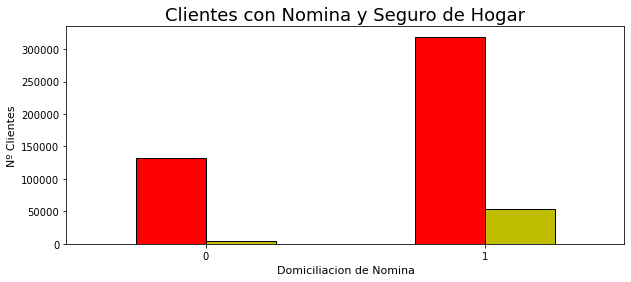

In [82]:
print(df.groupby('lp_dom_ingresos')['lp_seg_hogar'].value_counts())
df.groupby('lp_dom_ingresos')['lp_seg_hogar'].agg(['count','sum']).plot(kind ='bar',legend = '',
                     grid = False, color = ('r','y'), rot = 0, edgecolor = 'black', linewidth=1, figsize = (10,4))

plt.title('Clientes con Nomina y Seguro de Hogar', fontsize = 18)
plt.ylabel('Nº Clientes',fontsize = 11)
plt.xlabel('Domiciliacion de Nomina',fontsize = 11)
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Images/EDA-Clientes con Nomina y Seguro de Hogar.png', dpi=75,bbox_inches='tight')
plt.show()

## __CONCLUSIONES FINALES EDA__ .Variables a mantener y datos a modificar.

- __Bloque 1 - Variables unidades de negocio.__ Nuestro objetivo es determinar con los productos que tienen los clientes si son susceptibles de tener o no tener un seguro de hogar. Las Unidades de Negocio no han de influir en el modelo. Las elimino por lo tanto del modelo. 
         
- __Bloque 2 - Variables Edad.__ 
     Elimino del modelo a los clientes de 0 a 25 años y de mas de 90 años. 
    
- __Bloque 3 - Variables de Ahorro - Financiación__. Fondos de inversion y Planes de pension son covertidas a booleano. 

- __Bloque 4 - Variables de Servicios__.Eliminamos Seguro Saluc, Seguro Accidentes y lp Internet.

- __Bloque 5 - Variables de Seguros__. Todos los seguros seran utilizados dentro del modelo.

- __Bloque 6 - Variables de Segmentacion__. Cartera Patron, Clientescarterizados y BBP son eliminados del modelo. 
- __Bloque 7 - Variables digitales .__ Se mantiene camino digital.

__30 variables originales. 17 se mantienen incluida target.__

- 1) saldo_captacion                0.279079
- 2) saldo_financiacion             0.169123
- 3) edad                           0.154577
- 4) seg_valor                      0.076552
- 5) saldo_ffii                     0.054786
- 6) saldo_plp                      0.053133
- 7) lp_dom_ingresos                0.026537
- 8) camino_digital                 0.024198
- 9) seg_recorrido                  0.022719
- 10) marca_ccte                     0.021080
- 11) lp_seg_vida                    0.018652
- 12) lp_seg_auto                    0.013138
- 14) marca_bp                       0.012156
- 15) lp_tjta_cto                    0.011191
- 16) lp_tjt_rev                     0.010838
- 17) lp_seg_acc                     0.01021


In [83]:
variables_X_finales =['saldo_captacion','saldo_financiacion','edad','seg_valor','saldo_ffii', 'saldo_plp', 
                      'lp_dom_ingresos','camino_digital','seg_recorrido','marca_ccte','lp_seg_vida',
                       'lp_seg_auto','marca_bp','lp_tjta_cto', 'lp_tjt_rev','lp_seg_acc']

target_y_final = 'seguro_hogar'
       
      